In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cols_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names'
# urlretrieve(data_url, './auto-mpg.txt')
# html = urlopen(data_url)
# soup = BeautifulSoup(html, 'html.parser')
# soup

In [2]:
# col_html = urlopen(cols_url)
# col_soup = BeautifulSoup(col_html, 'html.parser')
# col_soup

In [3]:
import numpy as np
import pandas as pd
cols = 'mpg cylinders displacement horsepower weight acceleration model-year origin car-name'.split()

In [4]:
# soup

In [5]:
data = pd.read_csv(data_url, header = None, sep = '\s+')
data.columns = cols
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car-name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
obj_cols = ['car-name','origin']
for col in data.columns:
    if col not in obj_cols:
        try:
            data[col] = data[col].astype('float')
        except:
            pass
    else:
        data[col] = data[col].astype('category')
        
#         data[col] =data[col].astype('float')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    float64 
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model-year    398 non-null    float64 
 7   origin        398 non-null    category
 8   car-name      398 non-null    category
dtypes: category(2), float64(6), object(1)
memory usage: 33.7+ KB


In [9]:
data.loc[:,'mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [10]:
data.loc[:,'mpg'] = data.loc[:,'mpg'] * 0.425

In [11]:
data.loc[:,'mpg']

0       7.650
1       6.375
2       7.650
3       6.800
4       7.225
        ...  
393    11.475
394    18.700
395    13.600
396    11.900
397    13.175
Name: mpg, Length: 398, dtype: float64

In [12]:
for d in data['horsepower'].unique():
    try:
        float(d)
    except:
        print(d)

?


In [13]:
data['horsepower'] = data['horsepower'].replace('?', np.nan)

In [14]:
for col in data.columns:
    if col not in obj_cols:
        try:
            data[col] = data[col].astype('float')
        except:
            pass

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    float64 
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model-year    398 non-null    float64 
 7   origin        398 non-null    category
 8   car-name      398 non-null    category
dtypes: category(2), float64(7)
memory usage: 33.7 KB


In [16]:
data = data.dropna()

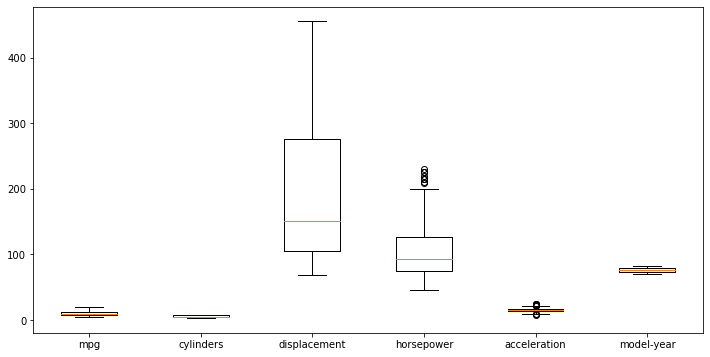

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.boxplot(data[[col for col in data.columns if col not in obj_cols+['weight']]])
plt.xticks(range(1,len(data.columns)-len(obj_cols)), [col for col in data.columns if col not in obj_cols+['weight']])
plt.show()

In [18]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year', 'origin', 'car-name'],
      dtype='object')

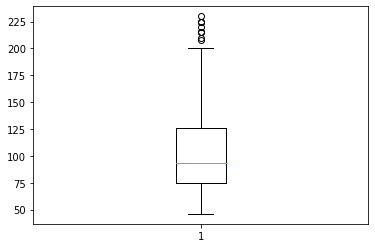

In [19]:
plt.boxplot(data['horsepower'])
plt.show()

In [20]:
def IQR_outlier(data,col):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    return {'upper': data[col].quantile(0.75)+1.5*IQR,
            'lower': data[col].quantile(0.25)-1.5*IQR
           }

In [21]:
for col in ['horsepower','acceleration']:
    IQR_dict = IQR_outlier(data, col)
    data[col] = np.where(data[col]<IQR_dict['upper'],
                         np.where(data[col]>IQR_dict['lower'],data[col], IQR_dict['lower']),
                         IQR_dict['upper'])

C:\Users\jhs85\AppData\Local\Temp\ipykernel_3252\3061223430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col]<IQR_dict['upper'],


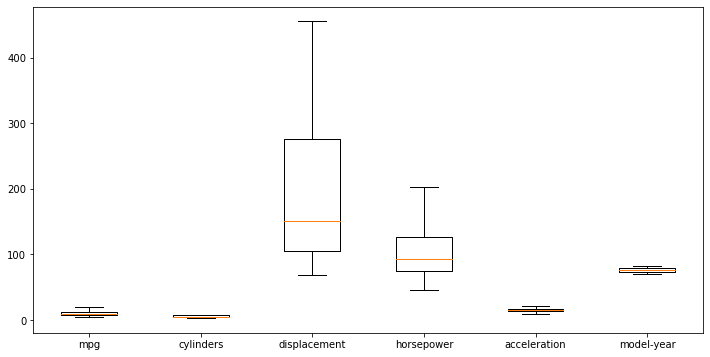

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.boxplot(data[[col for col in data.columns if col not in obj_cols+['weight']]])
plt.xticks(range(1,len(data.columns)-len(obj_cols)), [col for col in data.columns if col not in obj_cols+['weight']])
plt.show()

In [23]:
sorted(data.cylinders.unique())

[3.0, 4.0, 5.0, 6.0, 8.0]

In [24]:
data['model-year'].unique()

array([70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.])

In [25]:
data['model-year'] = pd.cut(data['model-year'], [69,74,79,82], labels=['70초', '70말', '80초']).astype('category')

C:\Users\jhs85\AppData\Local\Temp\ipykernel_3252\496533346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['model-year'] = pd.cut(data['model-year'], [69,74,79,82], labels=['70초', '70말', '80초']).astype('category')


In [26]:
obj_cols.append('model-year')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model-year    392 non-null    category
 7   origin        392 non-null    category
 8   car-name      392 non-null    category
dtypes: category(3), float64(6)
memory usage: 33.7 KB


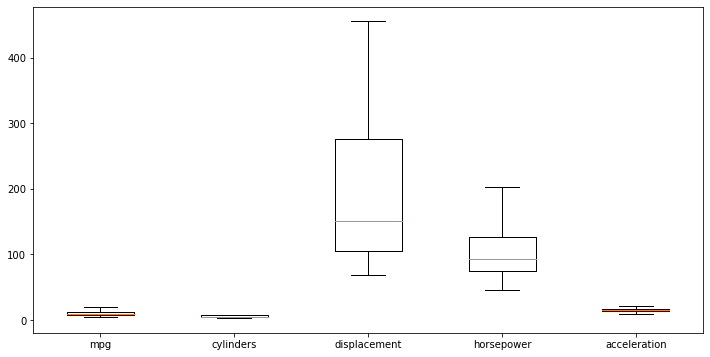

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.boxplot(data[[col for col in data.columns if col not in obj_cols+['weight']]])
plt.xticks(range(1,len(data.columns)-len(obj_cols)), [col for col in data.columns if col not in obj_cols+['weight']])
plt.show()

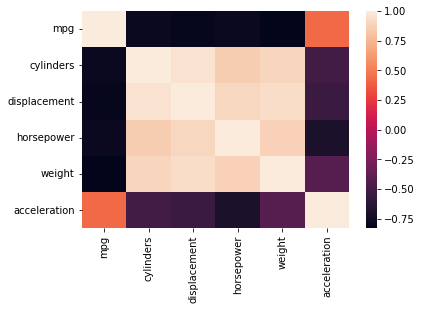

In [28]:

import seaborn as sns
sns.heatmap(data[[col for col in data.columns if col not in obj_cols]].corr())
plt.show()

In [29]:
# data = data.drop('car-name', axis = 1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data.drop('mpg', axis = 1), data['mpg'],random_state=493, stratify=data['origin'])

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt_train_x_num = pd.DataFrame(pt.fit_transform(train_x[[col for col in train_x.columns if col not in obj_cols]]), columns = [col for col in train_x.columns if col not in obj_cols])
pt_test_x_num = pd.DataFrame(pt.transform(test_x[[col for col in train_x.columns if col not in obj_cols]]), columns = [col for col in train_x.columns if col not in obj_cols])

In [31]:
train_x_dummy = pd.get_dummies(train_x[obj_cols[1:]],drop_first=True).reset_index(drop = True)
test_x_dummy = pd.get_dummies(test_x[obj_cols[1:]],drop_first=True).reset_index(drop = True)

In [32]:
dt_train_x = pd.concat([pt_train_x_num,train_x_dummy], axis = 1)
dt_test_x = pd.concat([pt_test_x_num,test_x_dummy], axis = 1)

In [33]:
dt_train_x

,cylinders,displacement,horsepower,weight,acceleration,origin_2,origin_3,model-year_70말,model-year_80초
0,-0.896251,-1.046895,-0.234503,-0.786111,1.268702,0,1,0,0
1,-0.896251,-0.714387,0.001491,-0.874644,-0.577405,0,1,0,0
2,-0.896251,-0.272318,-0.754577,-0.368689,0.546016,0,0,0,0
3,0.594508,0.664736,0.155106,-0.026681,-0.197153,0,0,0,0
4,1.346490,1.116001,1.078221,1.367482,-0.964077,0,0,1,0
...,...,...,...,...,...,...,...,...,...
289,0.594508,0.221869,0.431176,0.168896,0.325348,0,0,0,1
290,0.594508,0.611847,0.001491,0.528359,0.177176,0,0,1,0
291,-0.896251,-0.345392,-0.381995,-0.446455,0.065472,0,0,0,1
292,-0.896251,-0.587535,-0.754577,-0.368689,0.728498,0,1,0,1


In [34]:
from sklearn.utils import all_estimators

models = all_estimators('regressor')
names = []
train_scores = []
test_scores = []
for name, model in models:
    try:
        m = model()
        m.fit(dt_train_x, train_y)
        train_score = m.score(dt_train_x, train_y)
        test_score = m.score(dt_test_x, test_y)
        train_scores.append(train_score)
        test_scores.append(test_score)
        names.append(name)
    except:
        pass


    
    

C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:245: FutureWarning: As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jhs85\a

In [35]:
pd.DataFrame({
    'name':names,
    'train_scores':train_scores,
    'test_scores':test_scores
}).sort_values('train_scores', ascending=False)
    

,name,train_scores,test_scores
5,DecisionTreeRegressor,0.999740,0.696243
9,ExtraTreeRegressor,0.999740,0.763531
12,GaussianProcessRegressor,0.999740,-2.035668
10,ExtraTreesRegressor,0.999740,0.829070
37,RandomForestRegressor,0.978531,0.831566
13,GradientBoostingRegressor,0.967636,0.869249
2,BaggingRegressor,0.964259,0.810609
14,HistGradientBoostingRegressor,0.954223,0.827278
1,AdaBoostRegressor,0.896971,0.839741
16,KNeighborsRegressor,0.876863,0.848596


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(dt_train_x, train_y)
print('train score :', etr.score(dt_train_x, train_y))
print('test score :',etr.score(dt_test_x, test_y))

train score : 0.9997400966406678
test score : 0.8278638033454757


In [37]:
from sklearn.model_selection import GridSearchCV
etr = ExtraTreesRegressor()
param_grid = {
    'max_depth':[None, 5,6,7],
    'max_features':['auto',3,5],
    'min_samples_split':[None, 2,4, 6]
}

gs = GridSearchCV(etr, param_grid=param_grid, verbose = 2, return_train_score=True)
gs.fit(dt_train_x, train_y)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=4; total time=   0.2s

[CV] END ...max_depth=5, max_features=3, min_samples_split=6; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=5, max_features=5, min_samples_split=4; total time=   0.1s
[CV] END ...max_depth=5, max

[CV] END max_depth=7, max_features=3, min_samples_split=None; total time=   0.0s
[CV] END max_depth=7, max_features=3, min_samples_split=None; total time=   0.0s
[CV] END max_depth=7, max_features=3, min_samples_split=None; total time=   0.0s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.1s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.1s
[CV] END ...max_depth=7, max

C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\jhs85\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jhs85\anaconda3\lib\site-packages\j

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5, 6, 7],
                         'max_features': ['auto', 3, 5],
                         'min_samples_split': [None, 2, 4, 6]},
             return_train_score=True, verbose=2)

In [38]:
gs.best_params_

{'max_depth': None, 'max_features': 5, 'min_samples_split': 6}

In [39]:
gs.best_score_

0.8582247323015031

In [40]:
etr = gs.best_estimator_
etr.fit(dt_train_x, train_y)
print('train score :', etr.score(dt_train_x, train_y))
print('test score :',etr.score(dt_test_x, test_y))

train score : 0.9678693726775737
test score : 0.8460783240661929


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(dt_train_x, train_y)
print('train score :', rf.score(dt_train_x, train_y))
print('test score :',rf.score(dt_test_x, test_y))

train score : 0.9790925355659129
test score : 0.8386360503152278


In [42]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = {
    'max_depth':[None, 5,6,7],
    'max_features':['auto',3,5],
    'min_samples_split':[None, 2,4, 6]
}

gs = GridSearchCV(rf, param_grid=param_grid, verbose = 2, return_train_score=True)
gs.fit(dt_train_x, train_y)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=None; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=4; total time=   0.2s

[CV] END ...max_depth=5, max_features=3, min_samples_split=6; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=None; total time=   0.0s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=5, max_features=5, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=5, max_features=5, min_samples_split=4; total time=   0.3s
[CV] END ...max_depth=5, max

[CV] END max_depth=7, max_features=3, min_samples_split=None; total time=   0.0s
[CV] END max_depth=7, max_features=3, min_samples_split=None; total time=   0.0s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.3s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.4s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.2s
[CV] END ...max_depth=7, max_features=3, min_samples_split=4; total time=   0.2s
[CV] END ...max_depth=7, max

C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jhs85\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\jhs85\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jhs85\anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 6, 7],
                         'max_features': ['auto', 3, 5],
                         'min_samples_split': [None, 2, 4, 6]},
             return_train_score=True, verbose=2)

In [43]:
gs.best_params_

{'max_depth': None, 'max_features': 5, 'min_samples_split': 2}

In [44]:
gs.best_score_

0.8445948948097441

In [45]:
rf = gs.best_estimator_
rf.fit(dt_train_x, train_y)
print('train score :', rf.score(dt_train_x, train_y))
print('test score :',rf.score(dt_test_x, test_y))

train score : 0.9789158566811692
test score : 0.8408774928800531


## 딥러닝

In [47]:
dt_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cylinders       294 non-null    float64
 1   displacement    294 non-null    float64
 2   horsepower      294 non-null    float64
 3   weight          294 non-null    float64
 4   acceleration    294 non-null    float64
 5   origin_2        294 non-null    uint8  
 6   origin_3        294 non-null    uint8  
 7   model-year_70말  294 non-null    uint8  
 8   model-year_80초  294 non-null    uint8  
dtypes: float64(5), uint8(4)
memory usage: 12.8 KB


In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#모델 생성
model = Sequential()

l1= Dense(10, 
          activation='linear',
          input_shape = (9,)
         )
model.add(l1)
for i in range(4):
    l2 = Dense(50, activation= 'linear') 
    model.add(l2)
l3 = Dense(1, activation = 'linear')
model.add(l3)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                100       
                                                                 
 dense_15 (Dense)            (None, 50)                550       
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,351
Trainable params: 8,351
Non-traina

In [63]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_squared_error']
)

In [64]:
from tqdm import tqdm
tqdm(model.fit(dt_train_x, train_y, epochs=100))

Epoch 1/100
10/10 [==============================] - 2s 9ms/step - loss: 99.2359 - mean_squared_error: 99.2359
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 64.7646 - mean_squared_error: 64.7646
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 35.3174 - mean_squared_error: 35.3174
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 15.5816 - mean_squared_error: 15.5816
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 12.2657 - mean_squared_error: 12.2657
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 8.4368 - mean_squared_error: 8.4368
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 6.8387 - mean_squared_error: 6.8387
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 5.7058 - mean_squared_error: 5.7058
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 5.0512 - mean_squared_error: 5.0512
Epoch 1

10/10 [==============================] - 0s 4ms/step - loss: 1.6257 - mean_squared_error: 1.6257
Epoch 76/100
10/10 [==============================] - 0s 4ms/step - loss: 1.6124 - mean_squared_error: 1.6124
Epoch 77/100
10/10 [==============================] - 0s 5ms/step - loss: 1.5617 - mean_squared_error: 1.5617
Epoch 78/100
10/10 [==============================] - 0s 5ms/step - loss: 1.6040 - mean_squared_error: 1.6040
Epoch 79/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 80/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7746 - mean_squared_error: 1.7746
Epoch 81/100
10/10 [==============================] - 0s 5ms/step - loss: 1.7847 - mean_squared_error: 1.7847
Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7943 - mean_squared_error: 1.7943
Epoch 83/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7233 - mean_squared_error: 1.7233
Epoch 84/100
10/10 [===




0it [00:00, ?it/s]

In [65]:
model.evaluate(dt_test_x, test_y)

4/4 [==============================] - 0s 6ms/step - loss: 1.3552 - mean_squared_error: 1.3552


[1.3551615476608276, 1.3551615476608276]

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,rf.predict(dt_test_x))

1.9047979420535737